In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error  #importing basic things
from math import sqrt

In [2]:
from statsmodels.graphics.tsaplots import plot_acf  #autocorrelation function plot autocorrelation is basically our signal and our signal with a time lag and ur place these signals on top of one another

In [3]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

In [4]:
from statsmodels.tsa.arima_model import ARIMA #arima model

In [12]:
df1 = pd.read_csv('Demand Forecast - VEGGIES train.csv', parse_dates=True, index_col=[0])  #very imp setting date as index
df1.head()


,DEMAND
DATE,
2019-07-01,500
2019-07-02,800
2019-07-03,500
2019-07-04,100
2019-07-05,300


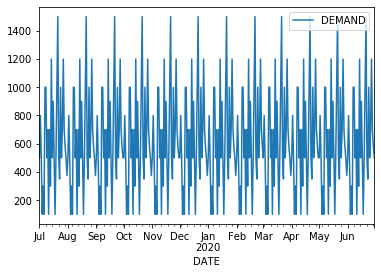

In [13]:
df1.plot()
plt.show()

In [14]:
demand_diff = df1.diff(periods=30)

In [15]:
demand_diff = demand_diff[30:]
demand_diff.head()

,DEMAND
DATE,
2019-07-31,-125.0
2019-08-01,-300.0
2019-08-02,300.0
2019-08-03,400.0
2019-08-04,-200.0


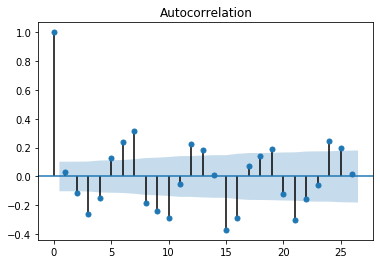

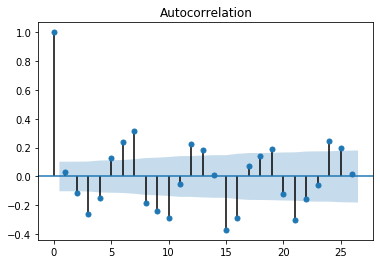

In [16]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df1.values)

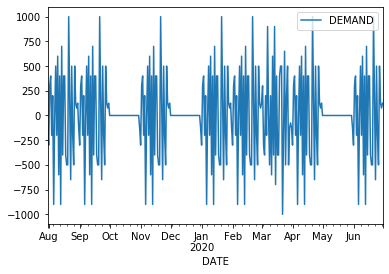

In [17]:
demand_diff.plot()

In [18]:
X1 = df1.values
train1 = X1[0:336]
test1 = X1[336:]

In [64]:
train1.shape

(336, 1)

In [19]:
model_arima = ARIMA(train1,order=(15,1,1))

In [20]:
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

4781.711006842707


In [71]:
y_pred1 = model_arima_fit.forecast(steps=366)[0].tolist()

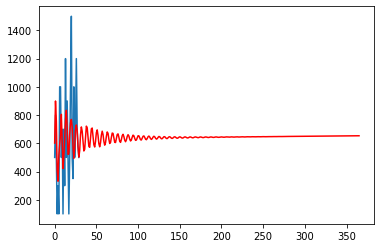

In [72]:
plt.plot(test1)
plt.plot(y_pred1 , color = 'red')

In [73]:
y_pred1 #the predicted values

[601.6487055471985,
 899.5961989795596,
 758.3985121801988,
 409.2776727967279,
 331.6013530411615,
 515.0413543264459,
 593.6097224806775,
 662.011662884121,
 805.2822705796592,
 625.4594784345213,
 422.27597042663876,
 512.4809590490386,
 626.8569090117948,
 768.2838105481334,
 833.8960020815412,
 709.5705991274996,
 521.0684295479151,
 525.15688896586,
 661.2551657993151,
 745.599543409819,
 769.3794527711915,
 713.1535292582935,
 582.3278697481005,
 493.0691266873487,
 574.0869128806326,
 697.1277837083737,
 730.1156323264586,
 686.8589897746613,
 574.765951627255,
 502.26148037763136,
 548.0064188764044,
 661.2484647938479,
 716.054015234531,
 685.5738672495336,
 613.6433718662777,
 545.7679746642466,
 557.7105759291549,
 645.2569110711414,
 721.667155883226,
 710.300034368199,
 639.735739516569,
 577.9978808563379,
 571.8215351880261,
 635.7464290925908,
 702.7837032771065,
 708.116698871892,
 651.2602199266928,
 590.1201151595056,
 574.0027349749421,
 613.473780888074,
 675.5484

In [63]:
test1 #actual values

array([[ 500],
       [ 800],
       [ 500],
       [ 100],
       [ 300],
       [ 100],
       [1000],
       [1000],
       [ 500],
       [ 700],
       [ 100],
       [ 700],
       [ 300],
       [1200],
       [ 500],
       [ 900],
       [ 500],
       [ 100],
       [ 500],
       [1000],
       [1500],
       [ 500],
       [ 350],
       [1000],
       [ 500],
       [ 700],
       [1200],
       [ 700],
       [ 575],
       [ 500]], dtype=int64)

In [58]:
from sklearn.metrics import r2_score
acc = r2_score(test1, y_pred1)
print(acc)  #67% accurate

0.25963620471899107


In [59]:
import pickle

In [74]:
filename='model_veggies.pkl'
pickle.dump(model_arima_fit, open(filename, 'wb'))

In [75]:
model = pickle.load(open(filename, 'rb'))